## Interactive Map

The ability to interact with data is important. This is true in all aspect of business. 

The simple act of gathering is the first step to utilize the data. We must also organize the data to make interpertable which gives stake holders the ability to analyze and create actionable strategies the provide meaningful value. 

This post will touch on every aspect mentioned above.
 



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from pandas_datareader import data, wb
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()



### Introduction to pandas_datareader and Plotly

- __pandas_datareader__ -  a sub package that allows one to create a dataframe from various internet datasources, currently including: 
    - Yahoo! Finance
    - St.Louis FED (FRED)
    - Kenneth French's data library
    - World Bank
    - Google Analytics
- __plotly__ - A graphing library that makes interactive, publication-quality graphs.



### 1.) Gathering and Organizing: 


We'll set up $pandas_DataReader$ and gather data from the following bank stocks with a time frame between 2006 to 2016:
 - Bank of America 'BAC'
 - CitiGroup 'C'
 - Goldman Sachs 'GS'
 - JPMorgan Chase 'JPM'
 - Morgan Stanley 'MS'
 - Wells Fargo 'WFC'
 
 
We then concat the datafram to one single df called $bank_stocks$.
 


In [2]:
BAC = data.DataReader('BAC', 'yahoo','JAN-01-2006','JAN-01-2016' )
C = data.DataReader('C', 'yahoo','JAN-01-2006','JAN-01-2016' )
GS = data.DataReader('GS', 'yahoo','JAN-01-2006','JAN-01-2016' )
JPM = data.DataReader('JPM', 'yahoo','JAN-01-2006','JAN-01-2016' )
MS = data.DataReader('MS', 'yahoo','JAN-01-2006','JAN-01-2016' )
WFC = data.DataReader('WFC', 'yahoo','JAN-01-2006','JAN-01-2016' )

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis =1,
                       keys= tickers)



In [3]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']
bank_stocks.head()

sns.set_style("whitegrid")

### 2.) EDA ( Exploratory Data Analysis)

EDA is an approach to analyze datasets to find helpful insights on how the datasets behave. Depending on the datasets, our approach will also change.


First step is figuring out the following: 
 - max value for each stock
 - min value
 - % change based on 'Close' column
 
 
Plot findings to see if there are useful insights to be gained. 

In [4]:
bank_stocks.xs('Close', axis = 1, level =1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [5]:
bank_stocks.xs('Close', axis = 1, level =1).min()

Bank Ticker
BAC     3.14
C      10.20
GS     52.00
JPM    15.90
MS      9.20
WFC     8.12
dtype: float64

We will use pandas $pct_change()$ method on the close column to create a %_change column on each instance of the bank stock. 

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

We will do the following: 


In [6]:
returns = pd.DataFrame()
for tick in tickers: 
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
    
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


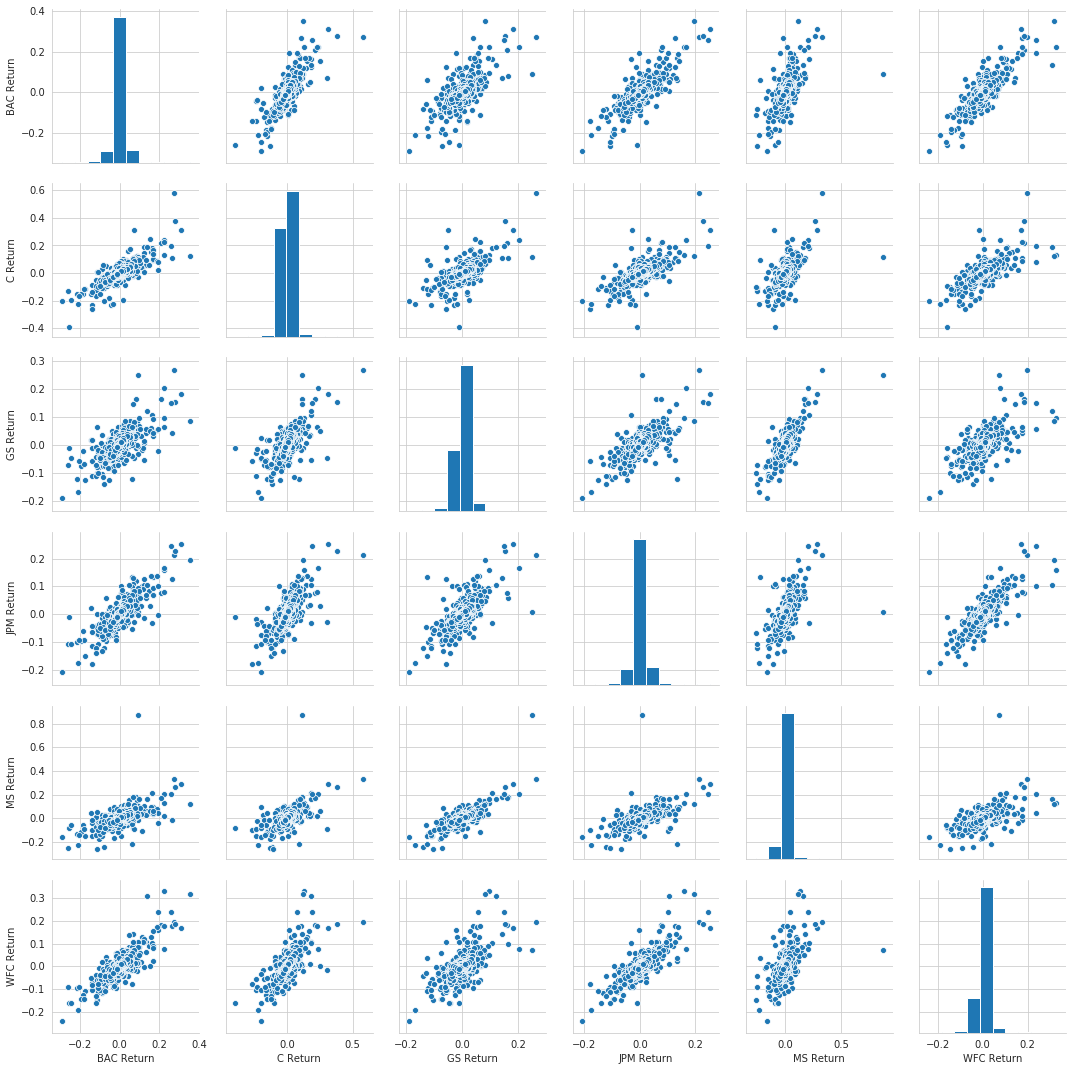

In [7]:
sns.pairplot(returns[1:])

From here, we're able analyze the data base on bip change rather than vlaue change. The following will show dates of biggest drops and gains respectivly.

In [8]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [9]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Analysis of the biggest drop in respect to time of bank stocks:


- BAC, GS, JPM and WFC all had their biggest drop on the same day.  The day is Obama's inauguration as the 44th President of the United States of America and became the United States' first African-American president. (2009-01-20)

- C had their biggest drop on Feb 27th 2009. It eclipse (2009-01-20) drop. The New York Time repported that Treasury Department is taking between 30 to 40 percent of C as part of the third bailout of banks during the recession. (2009-02-27)
 
- MS had their biggest hit on Oct. 9th 2018. This is due to a combination of things. First, the ban on short selling of bank stock was lifted. Second, there was a deal that had MS at the edge of bankruptcy if the deal  didn't go through. (2008-10-09) 
 

#### Charting the  $'close'$ column: 

The interactive graph below shows the rise and fall of bank stocks from 2006 to 2016. The data below shows that JPM, MS and WFC are the banks that recovered from their pre-recession status. 

Citibank is still way off from their pre-recession level and since the Treasury Department owns 30 -40% of Citibank, the bailout feels like a very bad investment. 

In [ ]:
import matplotlib.pyplot as plt

bank_stocks.xs(key='Close',axis=1, level='Stock Info').iplot()

for tick in tickers: 
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()


## Moving Averages 
 
The application of a simple mvoing average (SMA) is the unweighted mean of the previous n data. The calc is to analyze data points by creating a sereis of averages of different subsets of a full data set as it relates to time.

The advantage of this application is the ability of it to smooth out short-term fluctuations and highlight macro trends in our dataset.

Below is an example of a $rolling mean$ of both GS and WFC between 2008 and 2009.

In [ ]:
plt.figure(figsize = (12,4))

GS['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day moving average')
GS['Close'].loc['2008-01-01':'2009-01-01'].plot(label='GS Close')
WFC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day moving average')
WFC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='WFC Close')

plt.legend()

### Heatmap and Clustered Heatmap

Creating a clustered heat map is important in seeing correlation between data. 

This is important because it might give an edge to our predictive power. 

In [ ]:
sns.heatmap(bank_stocks.xs(key = 'Close', axis = 1, level = 1).corr(), annot = True)

In [ ]:
sns.clustermap(bank_stocks.xs(key = 'Close', axis = 1, level = 1).corr(), annot = True)

Here we see that both JPM and WFC has a positive correlation and they both have a negative correlatoin with C MS and BAC. 


This is important, because now we have questions we are able ask. 

1. How are JPM and WFC related? through products, investor demographic, partnerships, or risk outlook.
2. How are C, MS and BAC related? through products, investor demographic, partnerships, or risk outlook.
3. Once we have better clarity, we'll be able to pin point what makes a bank better or worst and so much more

The last part of our EDA is to add some Technical Analysis plots. We will rely heavily on iplots and cuffs.

In [ ]:
bac15 = BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01']

bac15.iplot(kind='candle')

In [ ]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods =[13,21,55])

In [ ]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

Credits:
 - https://riptutorial.com/pandas/topic/1912/pandas-datareader
 - https://finance.yahoo.com/
 - https://www.onthisday.com/date/2009/january/20
 - https://www.nytimes.com/2009/02/27/business/27deal.html
 - https://en.wikipedia.org/wiki/Moving_average